# Phase 1: Understanding the Problem

- Research and write a brief summary about employee burnout and its organizational impacts.

- Discuss the importance of using data to predict and prevent burnout.

**Employee Burnout and Its Organizational Impacts**

**Employee burnout** is a state of chronic physical and emotional exhaustion, often caused by prolonged work stress, lack of support, unclear job expectations, and work-life imbalance. It is recognized by the World Health Organization as an occupational phenomenon and is characterized by three main symptoms: energy depletion, increased mental distance from the job, and reduced professional effectiveness.

Burnout can lead to serious consequences for organizations. These include decreased productivity, higher absenteeism, low employee morale, and increased turnover rates. When employees feel overwhelmed or undervalued, their engagement and performance suffer, which in turn affects team collaboration, customer satisfaction, and overall business outcomes. In severe cases, it can also contribute to workplace conflicts and long-term health issues among staff.

---

**Using Data to Predict and Prevent Burnout**

Data plays a critical role in identifying early signs of burnout and enabling proactive interventions. By analyzing metrics such as employee engagement surveys, absenteeism rates, workload levels, overtime hours, and feedback from performance reviews, organizations can detect patterns that signal stress and burnout risks.

Predictive analytics can help HR teams and managers forecast burnout trends and design targeted support strategies, such as adjusting workloads, providing mental health resources, or enhancing employee recognition. When used responsibly, data empowers organizations to foster a healthier, more supportive work environment and sustain long-term employee well-being and productivity.


# Phase 2: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_id = '1YsDvd5wjSAmeCQtMOQNZrGIxgU7GFzRU'
train_url = f'https://drive.google.com/uc?export=download&id={file_id}'

train = pd.read_csv(train_url)

In [3]:
file_id = '1XsiwqEAkHeUF5yB83lvKeEw0uTun2-SA'
test_url = f'https://drive.google.com/uc?export=download&id={file_id}'

test = pd.read_csv(test_url)

In [4]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [5]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [6]:
print(train.shape)
print(test.shape)

(22750, 9)
(12250, 8)


In [7]:
print('Train set info')
print(train.info())
print()
print()
print('Test set info')
print(test.info())

Train set info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
None


Test set info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 

In [8]:
train.shape

(22750, 9)

In [9]:
train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [10]:
train.describe(include='object')

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available
count,22750,22750,22750,22750,22750
unique,22750,366,2,2,2
top,fffe3400350031003800,2008-01-06,Female,Service,Yes
freq,1,86,11908,14833,12290


In [11]:
# dropping the employee id column because it is not usefull in any way
train.drop('Employee ID', axis=1, inplace=True)

In [12]:
train.isna().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [13]:
# Percentage of missing values in each column
missing_percent = train.isnull().mean() * 100

# Display only columns with missing values
missing_percent[missing_percent > 0].sort_values(ascending=False)


,0
Mental Fatigue Score,9.305495
Resource Allocation,6.070330
Burn Rate,4.940659


The targe label columns `Burn Rate` has 1124 missing rows, I choose to drop the missing rows of the column since they are only less than 5% of the data.

In [14]:
train = train.dropna(subset=['Burn Rate'])

In [15]:
# I choose to fill in the missing values in 'Resource Allocation' and 'Mental Fatigue Score' with KNNImputer
from sklearn.impute import KNNImputer

# Select only the numerical columns you want to impute
impute_cols = ['Resource Allocation', 'Mental Fatigue Score']

# Create a copy of those columns
knn_data = train[impute_cols].copy()

# Initialize the imputer with k=5 (you can adjust this)
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
knn_imputed = imputer.fit_transform(knn_data)

# Replace the original columns in the DataFrame
train[impute_cols] = knn_imputed



/tmp/ipython-input-15-2413598726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[impute_cols] = knn_imputed


In [16]:
train.isna().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21626 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       21626 non-null  object 
 1   Gender                21626 non-null  object 
 2   Company Type          21626 non-null  object 
 3   WFH Setup Available   21626 non-null  object 
 4   Designation           21626 non-null  float64
 5   Resource Allocation   21626 non-null  float64
 6   Mental Fatigue Score  21626 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.5+ MB


In [18]:
train.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2.0,4.8,5.8,0.49
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


## EDA

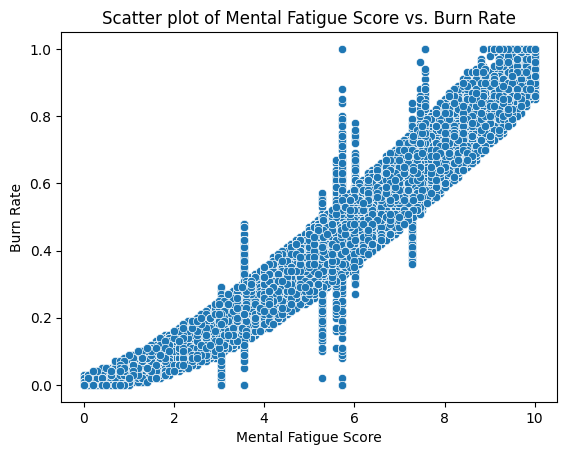

In [19]:

# Scatter plot for numerical variables vs. target variable
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=train)
plt.title('Scatter plot of Mental Fatigue Score vs. Burn Rate')
plt.show()


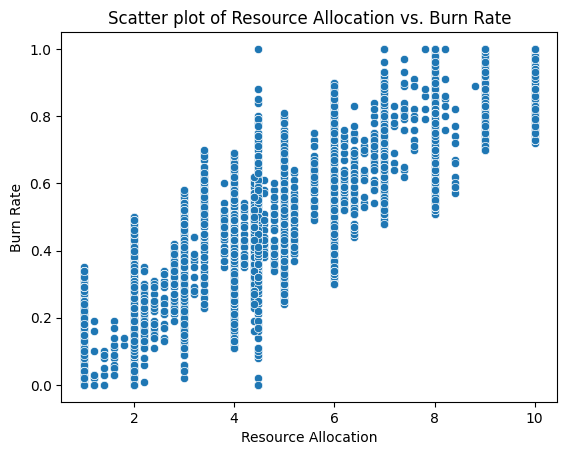

In [20]:

sns.scatterplot(x='Resource Allocation', y='Burn Rate', data=train)
plt.title('Scatter plot of Resource Allocation vs. Burn Rate')
plt.show()



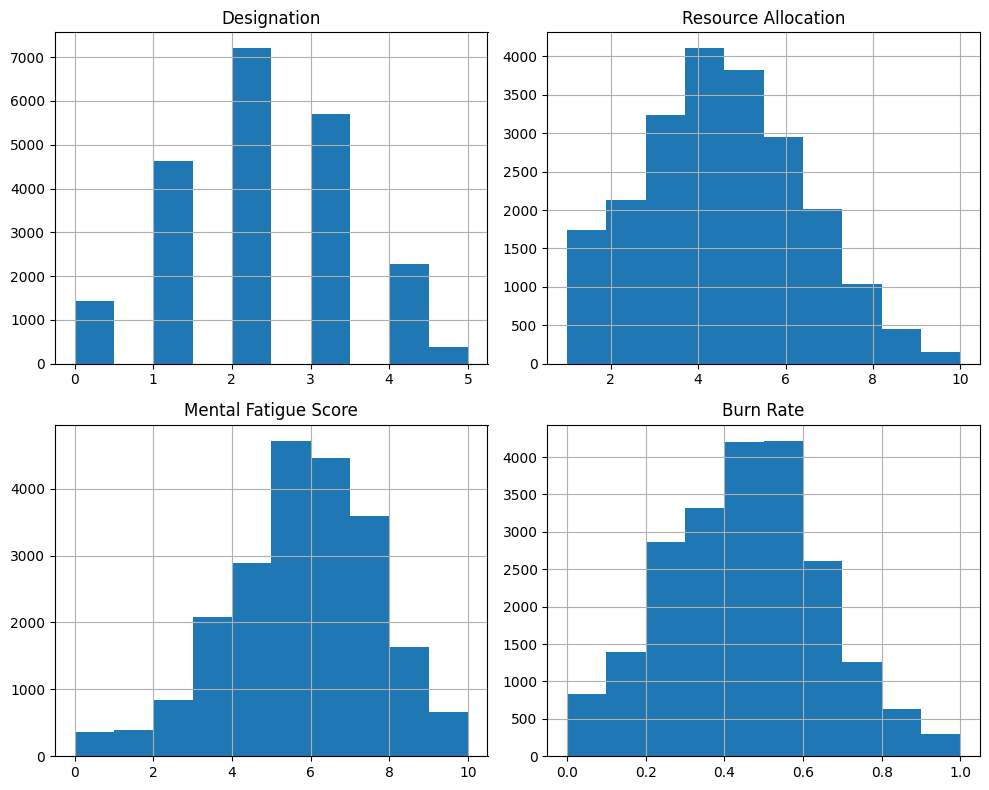

In [21]:
# Histograms for numerical variables
train.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



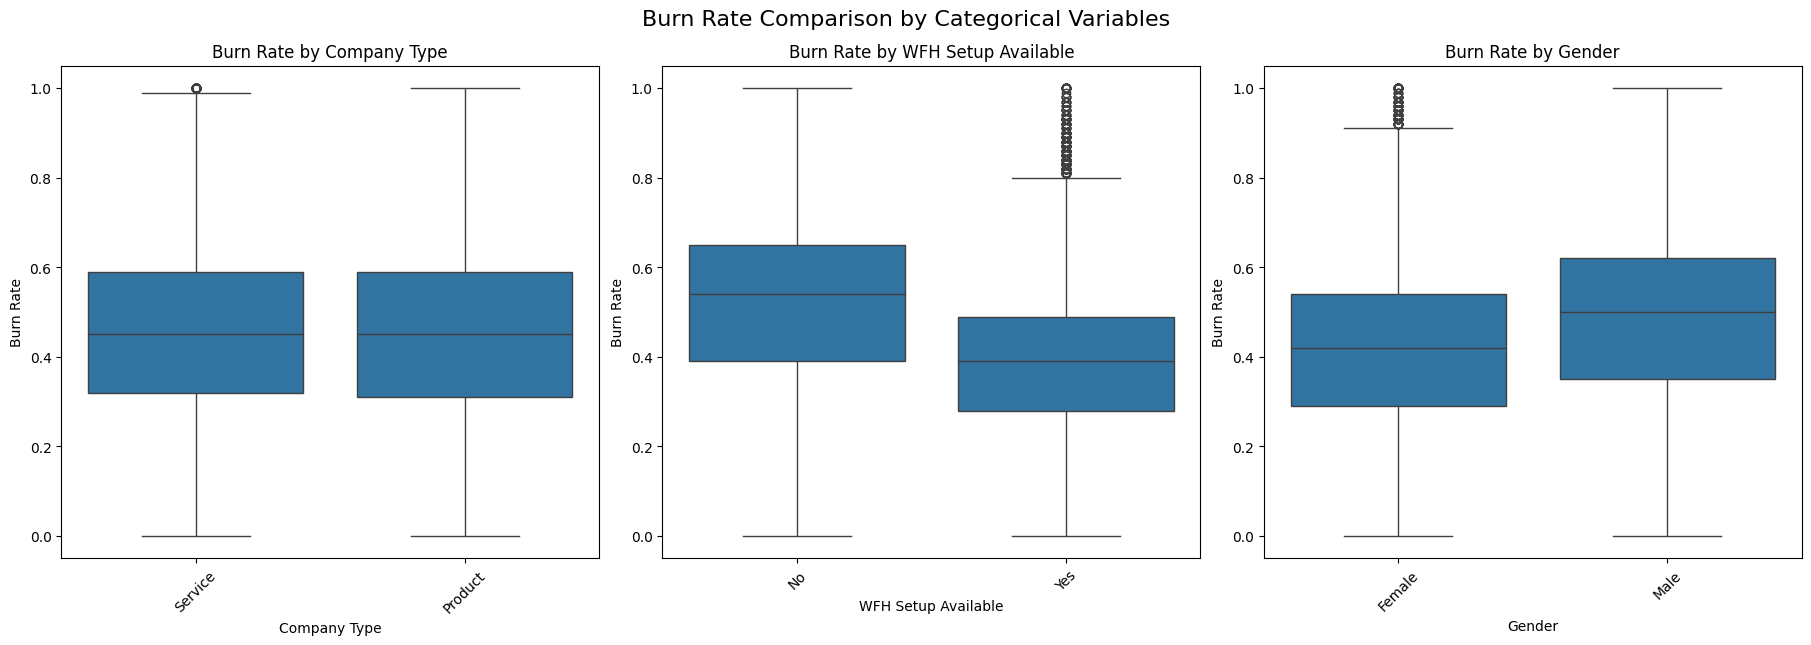

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot 1: Burn Rate by Company Type
sns.boxplot(x='Company Type', y='Burn Rate', data=train, ax=axes[0])
axes[0].set_title('Burn Rate by Company Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Burn Rate by WFH Setup Available
sns.boxplot(x='WFH Setup Available', y='Burn Rate', data=train, ax=axes[1])
axes[1].set_title('Burn Rate by WFH Setup Available')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Burn Rate by Gender
sns.boxplot(x='Gender', y='Burn Rate', data=train, ax=axes[2])
axes[2].set_title('Burn Rate by Gender')
axes[2].tick_params(axis='x', rotation=45)

# Show the combined plot
plt.suptitle('Burn Rate Comparison by Categorical Variables', fontsize=16, y=1.05)
plt.show()




In [23]:
train['Date of Joining'].head()

,Date of Joining
0,2008-09-30
1,2008-11-30
2,2008-03-10
3,2008-11-03
4,2008-07-24


In [24]:
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'])

In [25]:
train['Date of Joining'].head()

,Date of Joining
0,2008-09-30
1,2008-11-30
2,2008-03-10
3,2008-11-03
4,2008-07-24


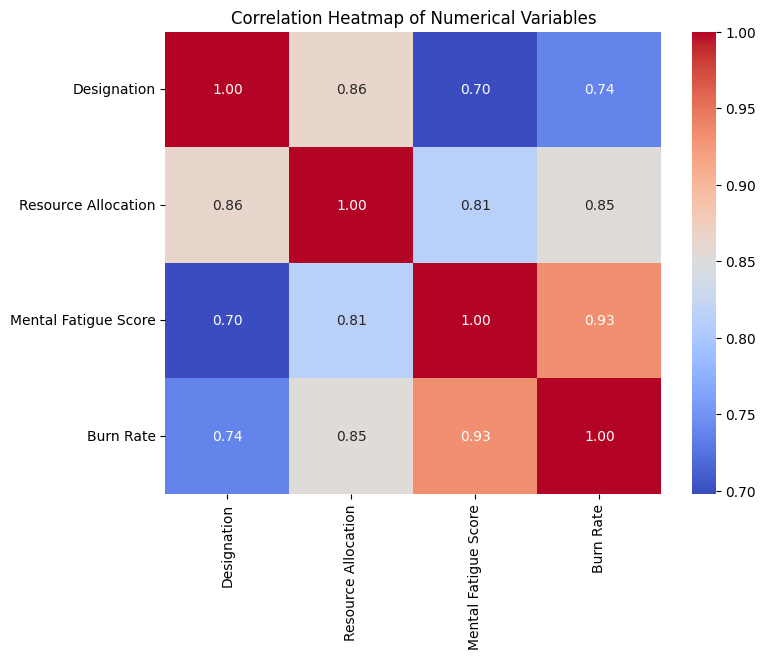

In [26]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Phase 3: Data Preprocessing

## Numerical variables

In [27]:
X = train.drop('Burn Rate', axis=1)
y = train['Burn Rate']

In [28]:
X.select_dtypes(include=np.number)

,Designation,Resource Allocation,Mental Fatigue Score
0,2.0,3.0,3.80
1,1.0,2.0,5.00
2,2.0,4.8,5.80
3,1.0,1.0,2.60
4,3.0,7.0,6.90
...,...,...,...
22745,1.0,3.0,5.28
22746,3.0,6.0,6.70
22747,3.0,7.0,7.46
22748,2.0,5.0,5.90


In [29]:


# Calculate tenure in years
today = pd.to_datetime('today')
X['Tenure (Years)'] = (today - X['Date of Joining']).dt.days / 365

X.drop('Date of Joining', axis=1, inplace=True)

In [30]:

from sklearn.preprocessing import MinMaxScaler


# 1. Identify numerical columns
numeric_cols = X.select_dtypes(include=np.number).columns

# 2. Create the scaler
scaler = MinMaxScaler()

# 3. Apply fit_transform only to the selected numerical columns
# The fit_transform method returns a NumPy array, so we need to convert it back to a DataFrame
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print(X.head()) # Print the head to see the scaled values

   Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          0.4             0.222222   
1    Male      Service                 Yes          0.2             0.111111   
2  Female      Product                 Yes          0.4             0.422222   
3    Male      Service                 Yes          0.2             0.000000   
4  Female      Service                  No          0.6             0.666667   

   Mental Fatigue Score  Tenure (Years)  
0                  0.38        0.252055  
1                  0.50        0.084932  
2                  0.58        0.810959  
3                  0.26        0.158904  
4                  0.69        0.438356  


## Categorical Features

In [31]:

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Create dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(X.head())

   Designation  Resource Allocation  Mental Fatigue Score  Tenure (Years)  \
0          0.4             0.222222                  0.38        0.252055   
1          0.2             0.111111                  0.50        0.084932   
2          0.4             0.422222                  0.58        0.810959   
3          0.2             0.000000                  0.26        0.158904   
4          0.6             0.666667                  0.69        0.438356   

   Gender_Male  Company Type_Service  WFH Setup Available_Yes  
0        False                  True                    False  
1         True                  True                     True  
2        False                 False                     True  
3         True                  True                     True  
4        False                  True                    False  


# Phase 4: Model Development

In [32]:
%load_ext cuml.accel

[2025-07-05 13:03:05.842] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-07-05 13:03:17.551] [CUML] [info] cuML: Installed accelerator for umap.
[2025-07-05 13:03:17.562] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-07-05 13:03:17.562] [CUML] [info] cuML: Successfully initialized accelerator.


In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (17300, 7)
X_test shape: (4326, 7)
y_train shape: (17300,)
y_test shape: (4326,)


In [34]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'R2': r2}

    print(f"{name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")
    print("-" * 30)

# Print a summary of results
print("\nModel Performance Summary:")
for name, metrics in results.items():
    print(f"{name}: RMSE={metrics['RMSE']:.4f}, R2={metrics['R2']:.4f}")



Training Linear Regression...
Linear Regression - RMSE: 0.0631, R2: 0.8953
------------------------------
Training Decision Tree...
Decision Tree - RMSE: 0.0829, R2: 0.8198
------------------------------
Training Random Forest...
Random Forest - RMSE: 0.0627, R2: 0.8969
------------------------------
Training Gradient Boosting...
Gradient Boosting - RMSE: 0.0602, R2: 0.9050
------------------------------

Model Performance Summary:
Linear Regression: RMSE=0.0631, R2=0.8953
Decision Tree: RMSE=0.0829, R2=0.8198
Random Forest: RMSE=0.0627, R2=0.8969
Gradient Boosting: RMSE=0.0602, R2=0.9050


The best model from the above summary is Gradient Boosting with: RMSE=0.0602, R2=0.9050.

## Optimize the best-performing model using hyperparameter tuning.

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Gradient Boosting
# param_grid = {
#     'n_estimators': [50, 100, 150],  # Reduced number of estimators
#     'learning_rate': [0.05, 0.1, 0.2], # Reduced learning rate options
#     'max_depth': [3, 4], # Reduced max_depth options
#     'min_samples_split': [2, 5], # Reduced min_samples_split options
#     'min_samples_leaf': [1, 2] # Reduced min_samples_leaf options
# }


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}


# Initialize GridSearchCV with the Gradient Boosting model and parameter grid
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, # Reduced cross-validation folds
                           scoring='neg_mean_squared_error', n_jobs=-1) # Use all available cores

print("Performing grid search for Gradient Boosting...")
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_) # Convert negative MSE to positive RMSE

print(f"\nBest parameters found: {best_params}")
print(f"Best cross-validation RMSE: {best_rmse:.4f}")

# Evaluate the best model on the test set
best_gb_model = grid_search.best_estimator_
y_pred_tuned = best_gb_model.predict(X_test)

tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(tuned_mse)
tuned_r2 = r2_score(y_test, y_pred_tuned)

print("\nTuned Gradient Boosting Model Performance on Test Set:")
print(f"RMSE: {tuned_rmse:.4f}")
print(f"R2: {tuned_r2:.4f}")

Performing grid search for Gradient Boosting...



Performing grid search for Gradient Boosting...

Best parameters found: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation RMSE: 0.0601

Tuned Gradient Boosting Model Performance on Test Set:
RMSE: 0.0589
R2: 0.9090


In [ ]:
Performing grid search for Gradient Boosting...

Best parameters found: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation RMSE: 0.0601

Tuned Gradient Boosting Model Performance on Test Set:
RMSE: 0.0589
R2: 0.9090